## Processing DOR Bound

Synatax
1ASM_B: chain B for PDB code 1asm

Chains


Questions
* How is water linked to the well type? 
* How do the protins vary for the DOR DDR?
* Can I predict the Frustration state

Confirmational Entropy
* DOR: Disorder to Order
* DDR: Disorder to Disorder
* CDR: Context Dependent

Dates removed by setting the column to zero digits in excel

In [1]:
import os
import pandas as pd
import numpy as np
import pylab as plt
#import pypdb
from IPython.display import HTML
from math import ceil

In [2]:
sheets  =  ['DDR', 'DOR', 'CDR']
excels = [f for f in os.listdir() if f.endswith('xlsx')]
excels

['All_bound.xlsx', 'All_free.xlsx', 'All_bound_old.xlsx']

In [27]:
sheet='DOR'
excel='All_bound.xlsx'
plt_path = os.path.join('plots',excel[:-5]+'_'+sheet)
pdb_dir  = 'pdbs'
if not os.path.isdir(plt_path): os.makedirs(plt_path)
if not os.path.isdir(pdb_dir): os.makedirs(pdb_dir)

## Get the chain seqence from a code

In [66]:
import pypdb
from Bio.PDB.PDBParser import PDBParser

PDB='1ARG'
pdb_file= os.path.join('pdbs',PDB+'.pdb')
if not os.path.isfile(os.path.join(pdb_file)):
    pdb_file = pypdb.get_pdb_file(PDB, filetype='pdb')
    print(pdb_file,  file=open(os.path.join(pdb_file), 'w'))
    # You can use a dict to convert three letter code to one letter code

d3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
         'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
         'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
         'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}

parser = PDBParser(QUIET=True)
structure = parser.get_structure('struct', pdb_file)    

<Structure id=struct>

In [118]:
chain_AA = {}
for model in structure:
    chain_dict = {}
    for chain in model: 
        seq, pos=[], []
        chain_val = chain.id
        for residue in chain:
            if residue.resname in d3to1:
                res_num = residue.get_full_id()[3][1]
                pos.append(res_num)
                seq.append(d3to1[residue.resname])
                #seq+=d3to1[residue.resname]
                #seq.append([residue.resseq,d3to1[residue.resname]])
        pos=np.array(pos)
        seq=np.array(seq)
        chain_dict[chain_val] ={'position': pos,'residues': seq}
chain_AA[PDB] = chain_dict
chain_AA

{'1ARG': {'A': {'position': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
           18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
           31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
           44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
           57,  58,  59,  60,  61,  62,  63,  64,  66,  67,  68,  69,  70,
           71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
           84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
           97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
          110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
          123, 124, 125, 126, 129, 133, 134, 135, 136, 137, 138, 139, 140,
          141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154,
          155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
          168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,


In [106]:
df = pd.read_excel(excel, sheet_name = sheet)
df

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,1ARG,5,7,A,A,3.304,0.057,M,E,-1.267,-1.571,0.444,-0.685,long,neutral
1,1ARG,5,8,A,A,3.304,0,M,N,-1.291,-1.571,0.444,-0.631,long,neutral
2,1ARG,5,9,A,A,3.304,3.957,M,I,-2.553,-1.571,0.444,2.21,long,minimally
3,1ARG,5,119,A,B,3.304,0.398,M,L,-2.395,-1.571,0.444,1.856,long,minimally
4,1ARG,5,123,A,B,3.304,0.999,M,T,-1.739,-1.571,0.444,0.378,short,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388003,5VN7,231,233,B,B,0.997,0,G,A,-1.243,-1.606,0.466,-0.779,short,neutral
388004,5VN7,231,234,B,B,0.997,1,G,E,-1.357,-1.606,0.466,-0.534,short,neutral
388005,5VN7,231,235,B,B,0.997,0,G,A,-1.324,-1.606,0.466,-0.604,water-mediated,neutral
388006,5VN7,232,234,B,B,1,1,E,E,-2.318,-1.606,0.466,1.53,water-mediated,minimally


In [15]:
df['Res1'].str.extract(pat='(\d+)', expand=False)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
388003    NaN
388004    NaN
388005    NaN
388006    NaN
388007    NaN
Name: Res1, Length: 388008, dtype: object

In [5]:
col_name = df.columns[0]# first column 1
df=df[df[col_name]!=col_name]# remove the repeated header rows

In [6]:
if sheet=='DOR' and excel == 'All_bound.xlsx':
    df['Res1'] = df['Res1'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
    df['Res2'] = df['Res2'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

df['Res1']=df.Res1.astype('int32')
df['Res2']=df.Res2.astype('int32')
df['FrstIndex']=df.FrstIndex.astype('float')

/tmp/ipykernel_31598/3304953555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res1'] = df['Res1'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
/tmp/ipykernel_31598/3304953555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Res2'] = df['Res2'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
/tmp/ipykernel_31598/3304953555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [7]:
for c in df.columns:
    uq = df[c].unique()
    print(c, len(uq))
    print(uq, '\n')

PdbID 78
['1ARG' '1ASM' '1AVP' '1B6C' '1BHM' '1BKD' '1CWQ' '1D2I' '1EPL' '1F34'
 '1F5Q' '1FJG' '1G4U' '1G64' '1GP2' '1H03' '1H3I' '1HN4' '1HYG' '1II6'
 '1IMA' '1IPS' '1IXY' '1J7V' '1K90' '1MK2' '1NVQ' '1O87' '1OW3' '1P7L'
 '1QJS' '1T8L' '1U1K' '1UJW' '1UZJ' '1VG9' '2AXT' '2CKD' '2EWN' '2H42'
 '2IKO' '2J6H' '2P0J' '2PAV' '2Q10' '2R56' '2Y48' '3AEV' '3AGZ' '3BUK'
 '3DG7' '3DS9' '3GLM' '3KTQ' '3NGS' '3OU6' '3PQC' '3V6R' '4E7Z' '4EI7'
 '4FG9' '4FOU' '4H3B' '4HBM' '4HOR' '4PBY' '4PSW' '4QRA' '4TYH' '4XJ0'
 '4Z2M' '5ACV' '5E5R' '5ETA' '5JIU' '5LI6' '5TB5' '5VN7'] 

Res1 1523
[   5    6    7 ... 3643 3644 3645] 

Res2 1525
[   7    8    9 ... 3647 3634 3641] 

ChainRes1 21
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'R' 'S' 'I' 'K' 'P' 'Q' 'L' 'J' 'M' 'O'
 'T' 'U' 'V'] 

ChainRes2 21
['A' 'B' 'C' 'E' 'H' 'D' 'F' 'G' 'R' 'S' 'I' 'K' 'P' 'Q' 'L' 'T' 'O' 'M'
 'J' 'V' 'U'] 

DensityRes1 6048
[3.304 3.223 0.057 ... 5.075 6.733 4.525] 

DensityRes2 6041
[0.057 0 3.957 ... 6.733 4.525 7.018] 

AA1 20
['M' 'F' 

In [8]:
grp=df.groupby(['PdbID','Res1','Res2'])['PdbID'].count()
groupings=grp.index.values
groupings

array([('1ARG', 5, 7), ('1ARG', 5, 8), ('1ARG', 5, 9), ...,
       ('5VN7', 231, 235), ('5VN7', 232, 234), ('5VN7', 233, 235)],
      dtype=object)

In [ ]:
matrix_dict ={}
PdbID=['1ARG','1ASM']
if PdbID is not False:# specific Pdb
    if type(PdbID) is not list: PdbID=[PdbID]
       
    for P in PdbID:
        pdb_df=df[df['PdbID']==P] #Create new  smaller df
        chain_1_max = pdb_df['Res1'].max()
        chain_2_max = pdb_df['Res2'].max()
        matrix= np.zeros((chain_1_max+1, chain_2_max+1, 1))
        uq_chain_1=pdb_df['Res1'].unique()
        uq_chain_2=pdb_df['Res2'].unique()
        for res1_idx in uq_chain_1:#cycle through chain 1 contacts
            res1_mask=pdb_df[['Res2', 'FrstIndex']][pdb_df['Res1']==res1_idx] #Mask for the rows with res1    
                
            calc=res1_mask.groupby(['Res2']).mean()
            res2_idx=calc.index.values
            res2_freq= calc.to_numpy()
        
            for i in range(len(res2_idx)): 
                matrix[res1_idx][res2_idx]=res2_freq[i]
            matrix_dict[P]=matrix
matrix_dict

In [16]:
def get_matrices(df, PdbID=False, cols=3):    
    matrix_dict ={}
    if PdbID is not False:# specific Pdb
        if type(PdbID) is not list: PdbID=[PdbID]
       
        for P in PdbID:
            pdb_df=df[df['PdbID']==P] #Create new  smaller df
            chain_1_max = pdb_df['Res1'].max()
            chain_2_max = pdb_df['Res2'].max()
            matrix= np.zeros((chain_1_max+1, chain_2_max+1, 1))
            uq_chain_1=pdb_df['Res1'].unique()
            uq_chain_2=pdb_df['Res2'].unique()
            for res1_idx in uq_chain_1:#cycle through chain 1 contacts
                res1_mask=pdb_df[['Res2', 'FrstIndex']][pdb_df['Res1']==res1_idx] #Mask for the rows with res1    
                
                calc=res1_mask.groupby(['Res2']).mean()
                res2_idx=calc.index.values
                res2_freq= calc.to_numpy()
        
                for i in range(len(res2_idx)): 
                    matrix[res1_idx][res2_idx]=res2_freq[i]
            matrix_dict[P]=matrix
    return matrix_dict

#PDB_list=list(df['PdbID'].unique())
PDB_list=['1ARG','1ASM']
get_matrices(df, PDB_list)

{'1ARG': array([[[ 0.    ],
         [ 0.    ],
         [ 0.    ],
         ...,
         [ 0.    ],
         [ 0.    ],
         [ 0.    ]],
 
        [[ 0.    ],
         [ 0.    ],
         [ 0.    ],
         ...,
         [ 0.    ],
         [ 0.    ],
         [ 0.    ]],
 
        [[ 0.    ],
         [ 0.    ],
         [ 0.    ],
         ...,
         [ 0.    ],
         [ 0.    ],
         [ 0.    ]],
 
        ...,
 
        [[ 0.    ],
         [ 0.    ],
         [ 0.    ],
         ...,
         [ 0.    ],
         [ 2.1405],
         [ 2.1405]],
 
        [[ 0.    ],
         [ 0.    ],
         [ 0.    ],
         ...,
         [ 0.    ],
         [ 0.    ],
         [ 0.    ]],
 
        [[ 0.    ],
         [ 0.    ],
         [ 0.    ],
         ...,
         [ 0.    ],
         [ 0.    ],
         [-0.1745]]]),
 '1ASM': array([[[ 0.   ],
         [ 0.   ],
         [ 0.   ],
         ...,
         [ 0.   ],
         [ 0.   ],
         [ 0.   ]],
 
        [[ 0.   

Nfigs 2
Plot: 0
['1ARG', '1ASM', '1AVP', '1B6C', '1BHM', '1BKD', '1CWQ', '1D2I', '1EPL']
Plot: 1
['1F34', '1F5Q', '1FJG', '1G4U', '1G64', '1GP2', '1H03', '1H3I', '1HN4']


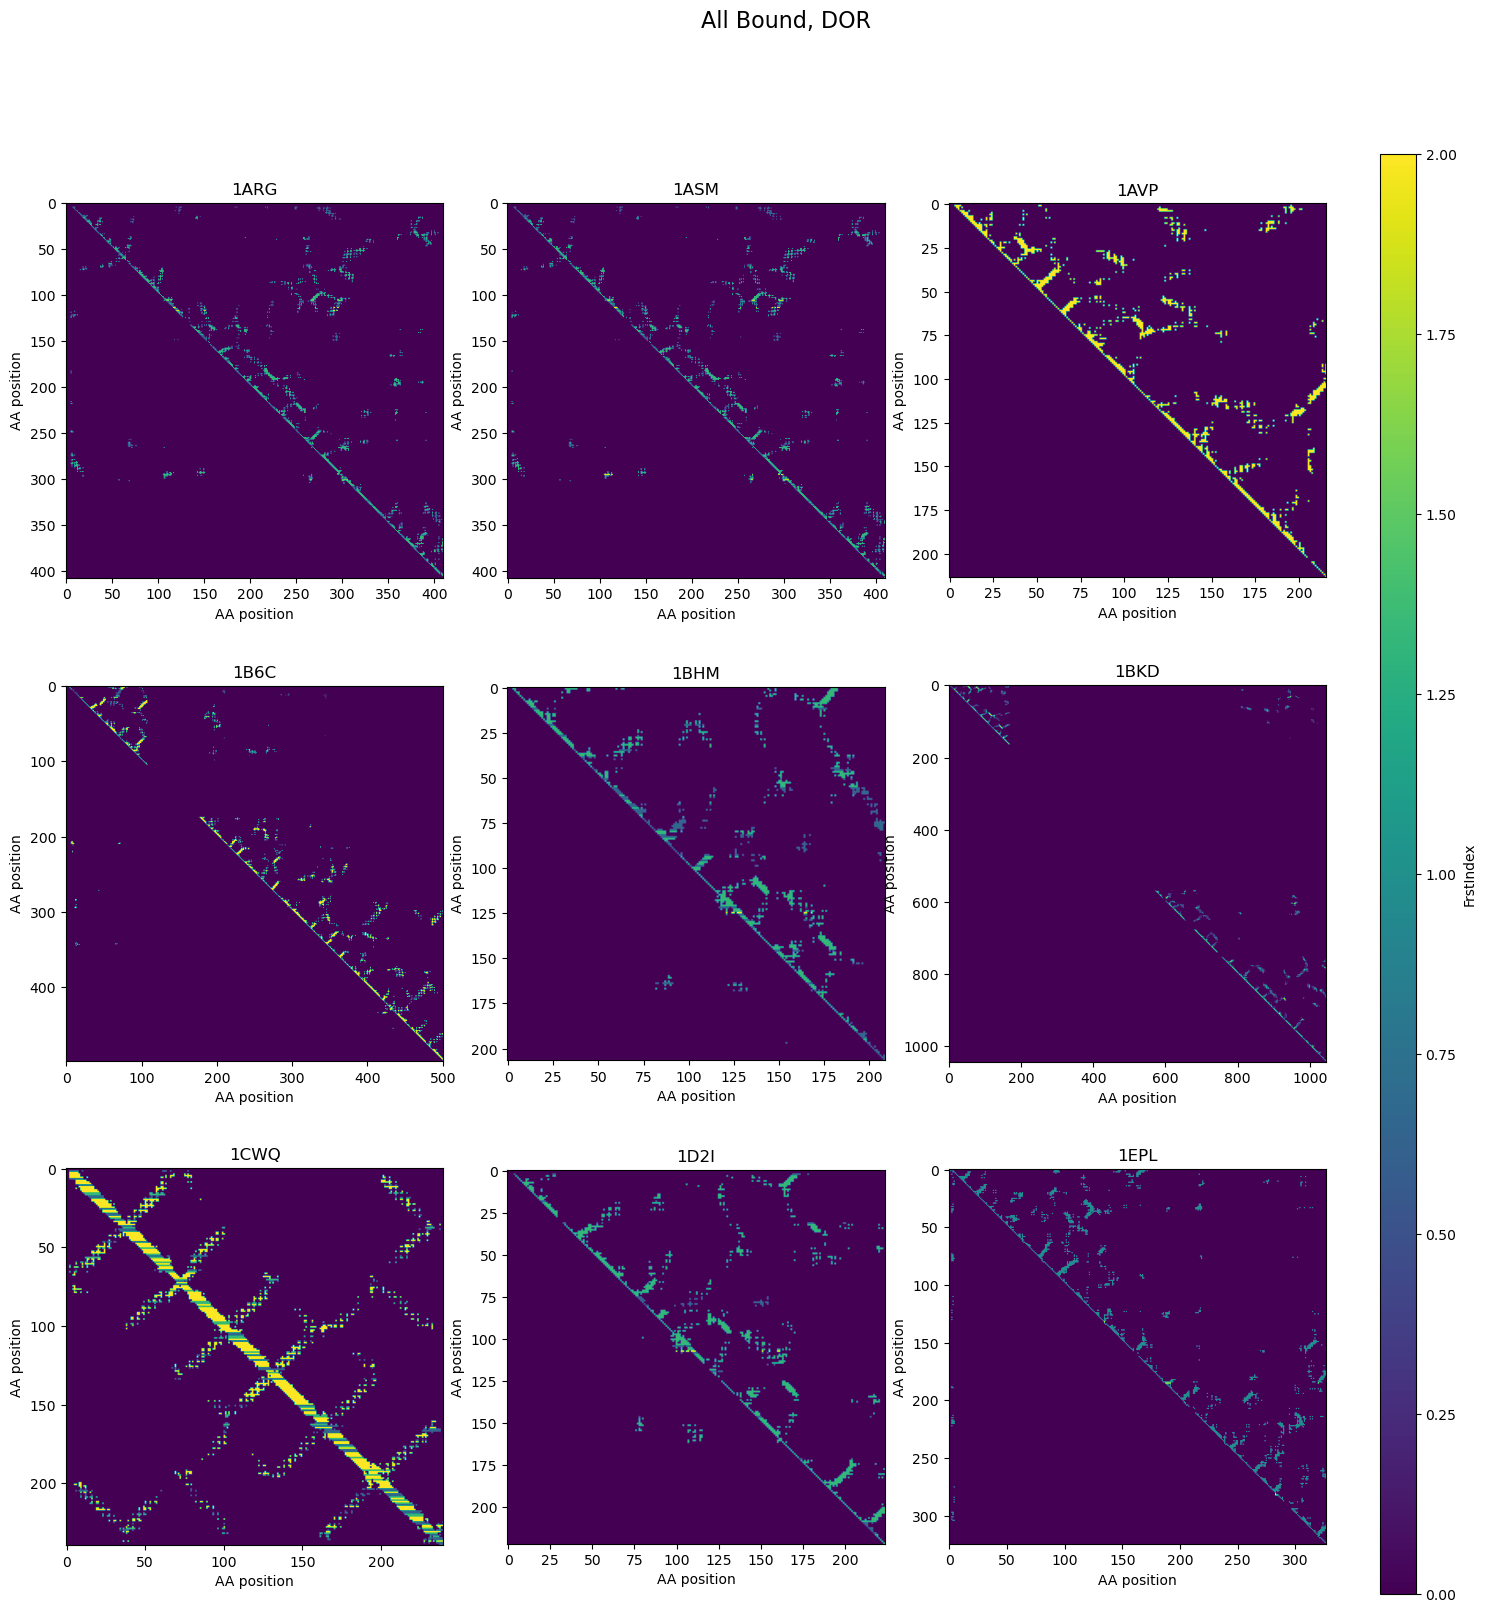

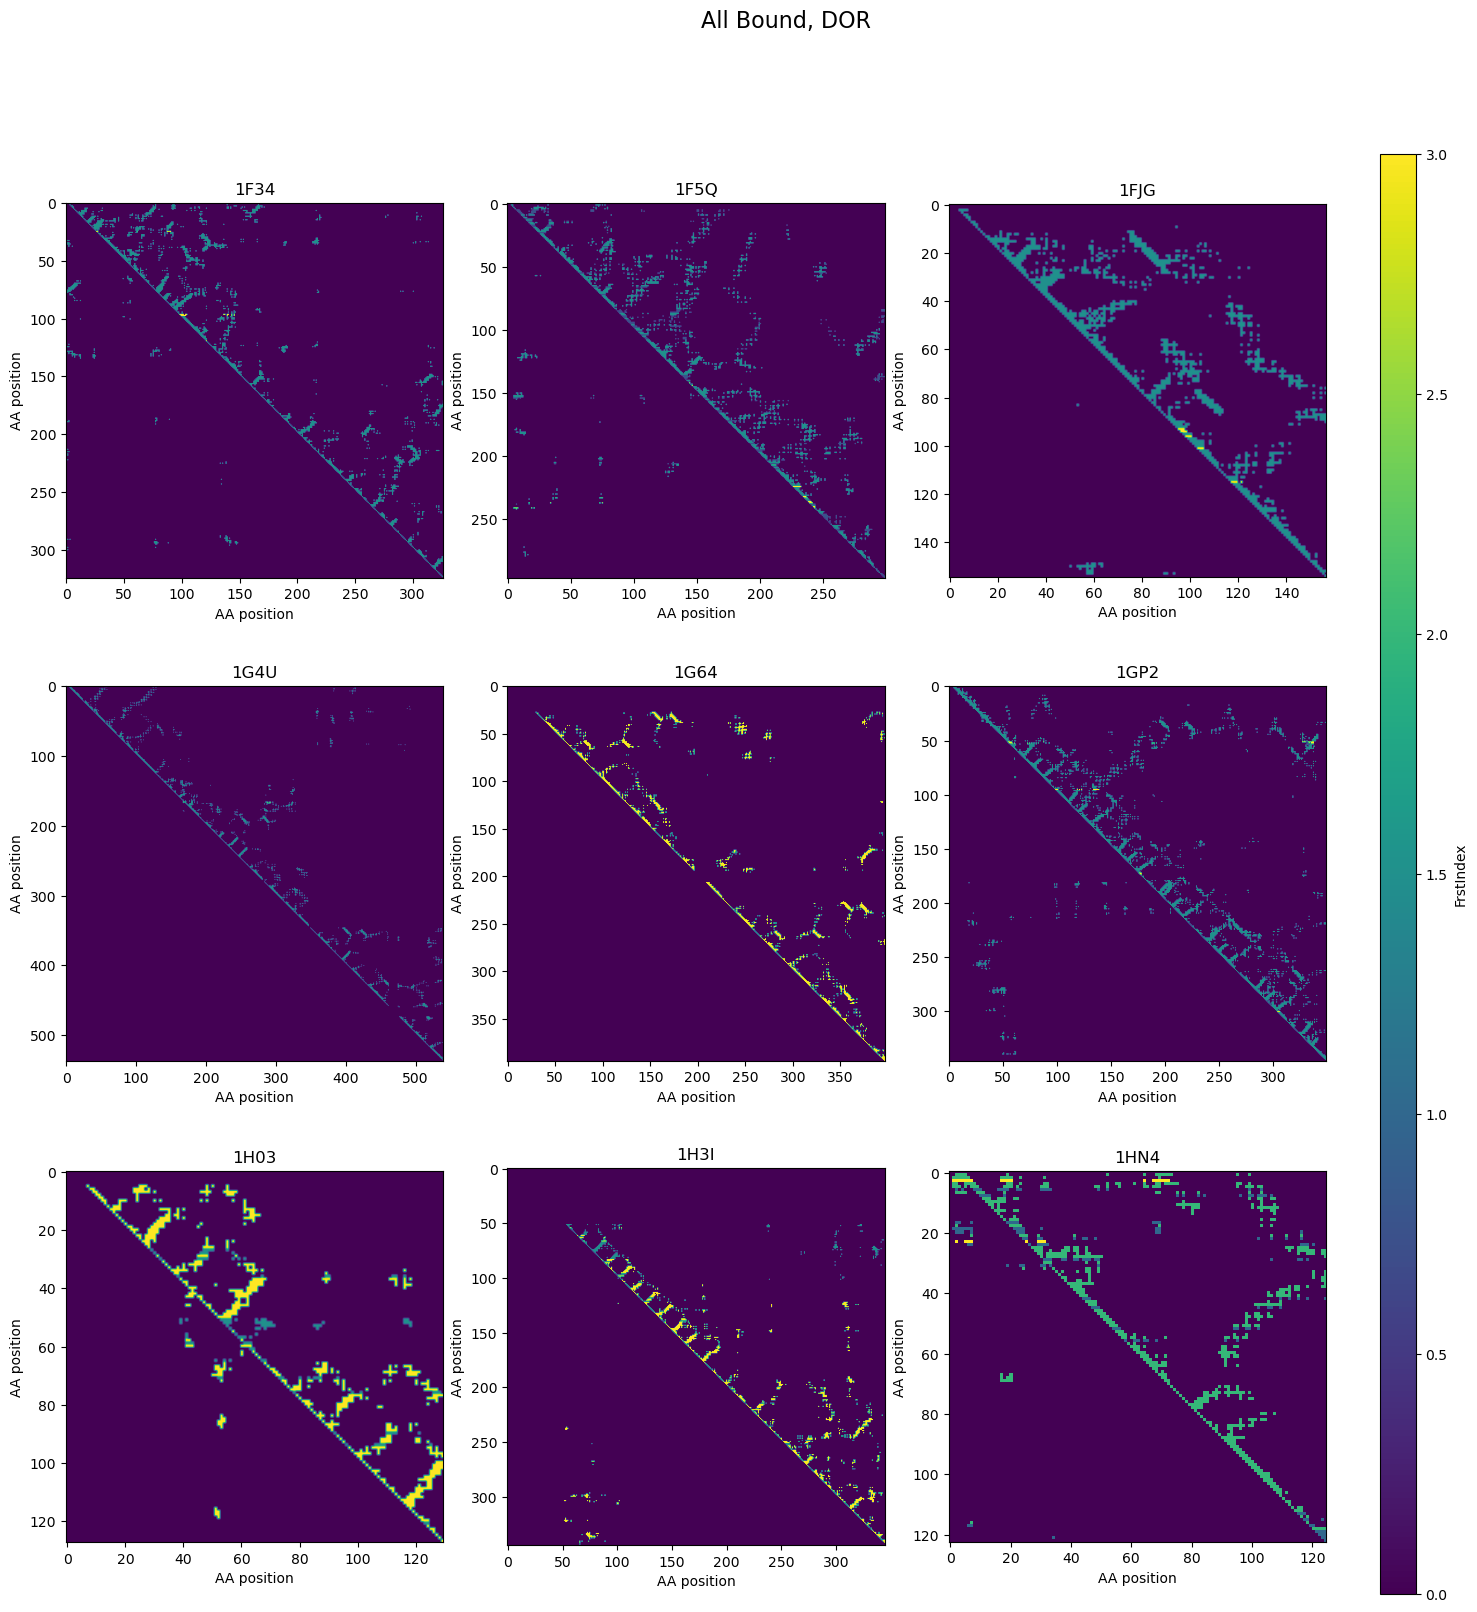

In [45]:
plt_titles= {'All_bound.xlsx':'All Bound','All_free.xlsx':'All Free' }

                    
def plot_correlation(df, PdbID=False, cols=3):    
    if PdbID is not False:# specific Pdb
        if type(PdbID) is not list: PdbID=[PdbID]
        plot_rows= ceil(len(PdbID)/cols)
        plt_i, plt_j =0,0
        fig, ax =plt.subplots(nrows = plot_rows, ncols= cols, figsize=(6*plot_rows,6*cols))
        fig.suptitle(plt_titles[excel]+', '+sheet, fontsize=16)

        for P in PdbID:
            pdb_df=df[df['PdbID']==P] #Create new  smaller df
            chain_1_max = pdb_df['Res1'].max()
            chain_2_max = pdb_df['Res2'].max()
            matrix= np.zeros((chain_1_max+1, chain_2_max+1, 1))
            uq_chain_1=pdb_df['Res1'].unique()
            uq_chain_2=pdb_df['Res2'].unique()
            for res1_idx in uq_chain_1:#cycle through chain 1 contacts
                res1_mask=pdb_df[['Res2', 'FrstIndex']][pdb_df['Res1']==res1_idx] #Mask for the rows with res1 
                counts=res1_mask.groupby(['Res2']).count()
                res2_idx=counts.index.values
                res2_freq= counts.to_numpy()
        
                for i in range(len(res2_idx)): 
                    matrix[res1_idx][res2_idx]=res2_freq[i]    
                    
            if plot_rows >1: # subplots iterator
                AX= ax[plt_j][plt_i]
                plt_i+=1
                if plt_i == cols:
                    plt_j+=1
                    plt_i=0
            else: 
                AX= ax[plt_i]
                plt_i+=1
                
            t1=AX.imshow(matrix)        
            AX.set_title(P)
            AX.set_xlabel('Chain 1: AA position')
            AX.set_ylabel('Chain 2: AA position')
    
    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.17, hspace=0.02)
    cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
    fig.colorbar(t1, label ='FrstIndex', cax=cb_ax)
    fig.savefig(os.path.join(plt_path,'correlation_'+PdbID[0]+'_to_'+PdbID[-1]+'.png'))

def plot_multi_figures(df, PDBs, fig_plots=9):
    N_figs = ceil(len(PDBs)/fig_plots)
    print('Nfigs',N_figs)
    start, end=0, fig_plots  

    for p in range(0, N_figs):
        print("Plot:", p)
        if end > len(PDBs): end=len(PDBs)
        PDBs_= PDBs[start:end]
        print(PDBs_)
        start+=fig_plots
        end+=fig_plots
        plot_correlation(df, PDBs_)

PDB_list=list(df['PdbID'].unique())#all PDB Names
PDB_plot_list=PDB_list[0:18]
plot_multi_figures(df, PDB_plot_list)      

## Exploring the data
#### Well Type 

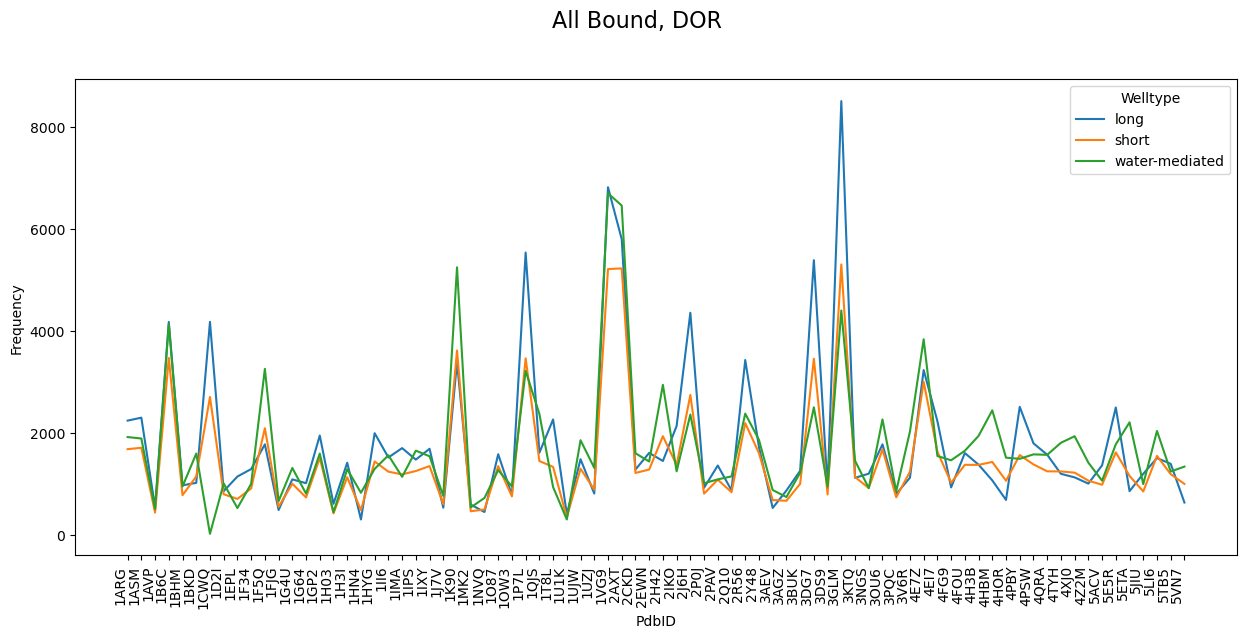

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
fig.autofmt_xdate(rotation=90)
fig.suptitle(plt_titles[excel]+', '+sheet, fontsize=16)
well=df.groupby(['PdbID','Welltype']).count()['FrstIndex'].unstack()
well.plot(ax=ax)

ax.set_ylabel("Frequency")
ax.set_xticks(range(0, len(PDB_list)),PDB_list,rotation=90)
fig.savefig(os.path.join(plt_path,'well_freq.png'))

In [71]:
well

Welltype,long,short,water-mediated
PdbID,,,
1ARG,2238,1677,1915
1ASM,2296,1705,1887
1AVP,533,431,501
1B6C,4177,3469,4133
1BHM,967,773,944
...,...,...,...
5ETA,853,1152,2205
5JIU,1193,846,991
5LI6,1502,1546,2035


/tmp/ipykernel_14412/1206345563.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trim.groupby(['PdbID','Welltype']).mean()['FrstIndex'].unstack().plot(ax=ax)


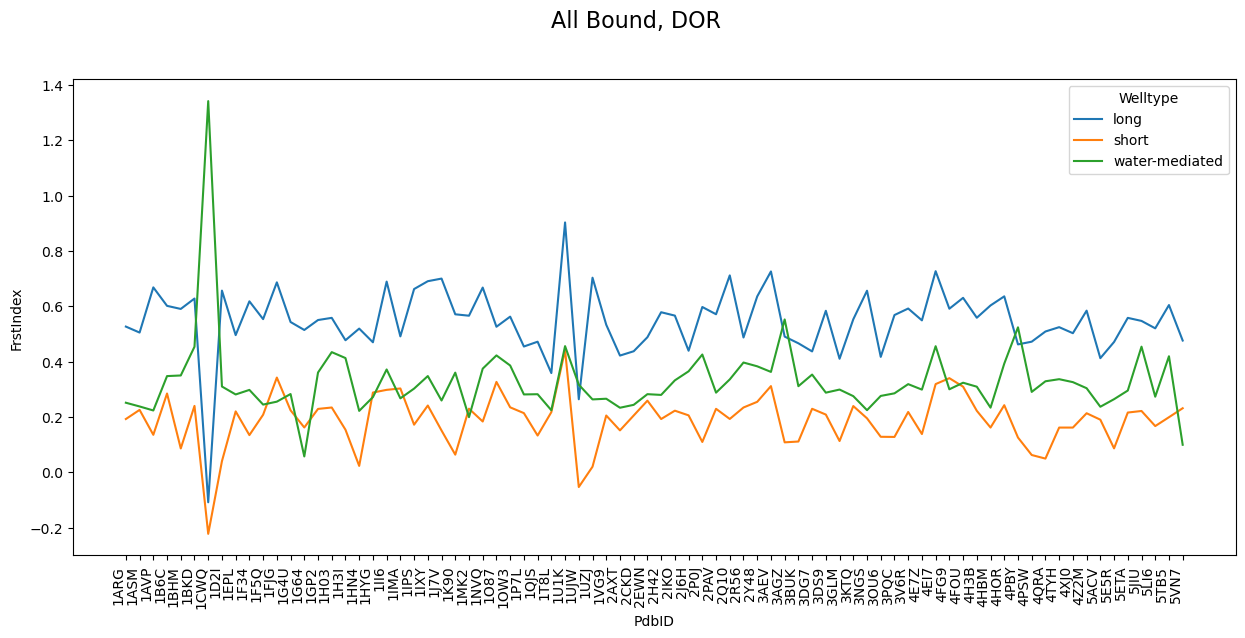

In [50]:
fig, ax = plt.subplots(figsize=(15,7))
fig.autofmt_xdate(rotation=90)
fig.suptitle(plt_titles[excel]+', '+sheet, fontsize=16)

df_trim.groupby(['PdbID','Welltype']).mean()['FrstIndex'].unstack().plot(ax=ax)
PDB_list=list(df_trim['PdbID'].unique())#all PDB Names
ax.set_xticks(range(0, len(PDB_list)),PDB_list,rotation=90)
ax.set_ylabel("FrstIndex")
fig.savefig(os.path.join(plt_path,'FrstIndex_Well.png'))

/tmp/ipykernel_14412/2043101732.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_trim.groupby(['PdbID','FrstState']).mean()['FrstIndex'].unstack().plot(ax=ax)
/tmp/ipykernel_14412/2043101732.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


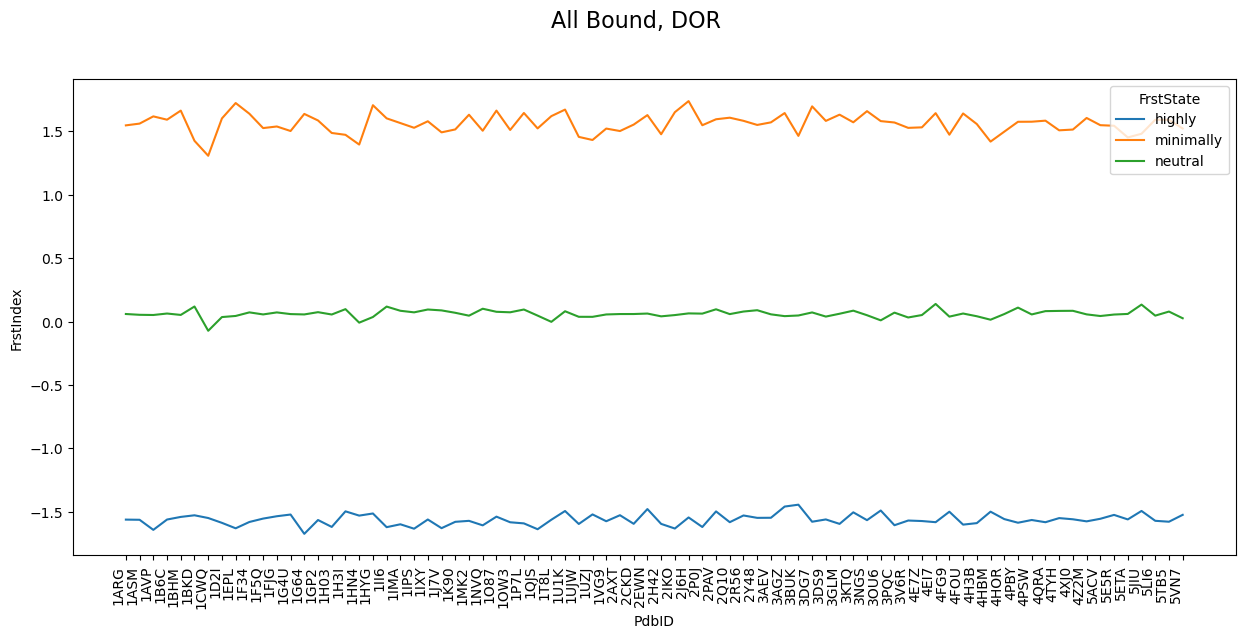

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle(plt_titles[excel]+', '+sheet, fontsize=16)
fig.autofmt_xdate(rotation=90)

df_trim=df[['PdbID', 'Welltype', 'FrstIndex', 'FrstState']].copy()
df_trim.groupby(['PdbID','FrstState']).mean()['FrstIndex'].unstack().plot(ax=ax)
PDB_list=list(df_trim['PdbID'].unique())#all PDB Names

ax.set_xticks(range(0, len(PDB_list)),PDB_list,rotation=90)
ax.set_ylabel("FrstIndex")
fig.show()
fig.savefig(os.path.join(plt_path,'FrstIndex_FrstState.png'))

In [49]:
df_trim=df[['PdbID', 'Welltype', 'FrstIndex', 'FrstState']]
df_trim
#df_trim.groupby(['PdbID','FrstState']).mean()['FrstIndex'].unstack()

,PdbID,Welltype,FrstIndex,FrstState
0,1ARG,long,-0.685,neutral
1,1ARG,long,-0.631,neutral
2,1ARG,long,2.210,minimally
3,1ARG,long,1.856,minimally
4,1ARG,short,0.378,neutral
...,...,...,...,...
388003,5VN7,short,-0.779,neutral
388004,5VN7,short,-0.534,neutral
388005,5VN7,water-mediated,-0.604,neutral
388006,5VN7,water-mediated,1.530,minimally


### Machine Learning
* Randomly samples rows for training at the moment should it do a blind protein ie no rows from that one?

In [7]:
df

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,1ASM_B,5,7,B,B,0,0,M,E,-1.115,-1.512,0.455,7.0,water-mediated,neutral
1,1ASM_B,5,8,B,B,0,0,M,N,-0.787,-1.512,0.455,8.0,water-mediated,highly
2,1ASM_B,5,9,B,B,0,0,M,I,-1.534,-1.512,0.455,9.0,water-mediated,neutral
3,1ASM_B,6,8,B,B,0,0,F,N,-0.988,-1.512,0.455,8.0,water-mediated,highly
4,1ASM_B,6,9,B,B,0,0,F,I,-1.668,-1.512,0.455,9.0,short,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167763,5VN7_B,231,233,B,B,0.997,0,G,A,-1.243,-1.576,0.461,233.0,short,neutral
167764,5VN7_B,231,234,B,B,0.997,1,G,E,-1.357,-1.576,0.461,234.0,short,neutral
167765,5VN7_B,231,235,B,B,0.997,0,G,A,-1.324,-1.576,0.461,235.0,water-mediated,neutral
167766,5VN7_B,232,234,B,B,1,1,E,E,-2.318,-1.576,0.461,234.0,water-mediated,minimally


In [51]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

/home/jake/anaconda3/envs/msim/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Encodeing the string labels to integers

In [52]:
#string_cols= ['PdbID', 'AA1','AA2','Welltype','FrstState']
string_cols= ['AA1','AA2','FrstState']
numeric_cols= [] #['Res1','Res2']
cols_to_keep = string_cols + numeric_cols
unique_vals = {i:df[i].unique() for i in string_cols}
encoders = {i:LabelEncoder() for i in string_cols}
a=[encoders[i].fit(unique_vals[i]) for i in string_cols]
df2=df.copy()
for i in string_cols:
    df2[i]=encoders[i].transform(df2[i])
df2
encoders['AA1'].inverse_transform([1,2,3])
#encoders['PdbID']#.transform(df2['PdbID'])

array(['C', 'D', 'E'], dtype=object)

In [53]:
cols_to_keep =['AA1','AA2']
#cols_to_keep =['Res1','Res2','AA1','AA2']
X_train, X_test, y_train, y_test = train_test_split(df2[cols_to_keep],
                                                    df2['FrstState'].values,
                                                    test_size=0.2, random_state=1234)

In [54]:
X_train.values

array([[15,  4],
       [ 2,  7],
       [16,  3],
       ...,
       [16,  7],
       [ 2, 16],
       [ 2, 15]])

In [55]:
y_train

array([2, 0, 2, ..., 2, 2, 0])

In [56]:
%%time
xgb = XGBClassifier(n_jobs = 1)
xgb.fit(X_train.values, y_train)

CPU times: user 39 s, sys: 3.63 ms, total: 39 s
Wall time: 39 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [57]:
xgb.score(X_test, y_test)

0.7585357994457692

In [58]:
X_test[0:10]

,AA1,AA2
240529,12,2
107391,5,4
135698,19,2
139647,7,18
251321,0,12
249025,17,11
369400,8,10
358850,0,2
289396,9,17
135772,18,15


In [59]:
xgb.predict(X_test)[0:10]

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2])

In [60]:
encoders['FrstState'].inverse_transform(xgb.predict(X_test))

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

 ## Classifing the contact amino acids 

In [61]:
#Info from slides
AA_polar = {'G':'Special', 
            'A':'Non Polar', 'C':'Non Polar', 'P':'Non Polar', 'V':'Non Polar',
            'M':'Non Polar','L':'Non Polar', 'I':'Non Polar',
            'F':'Non Polar','Y':'Non Polar','W':'Non Polar',
            'S':'Polar','T':'Polar','N':'Polar','D':'Polar','Q':'Polar',
            'E':'Polar','H':'Polar','K':'Polar','R':'Polar'}

AA_more =  {'G':'Special', 
            'A':'Non Polar', 'C':'Special', 'P':'Special', 'V':'Non Polar',
            'M':'Non Polar','L':'Non Polar', 'I':'Non Polar',
            'F':'Bulky','Y':'Bulky','W':'Bulky',
            'S':'Polar','T':'Polar','N':'Polar','D':'Negative','Q':'Polar',
            'E':'Negative','H':'Positive','K':'Positive','R':'Positive'}   

AA_polar['A']

'Non Polar'

In [62]:
#string_cols= ['PdbID', 'AA1','AA2','Welltype','FrstState']
df2=df.copy()
df2['AA1_Polar'] = df2['AA1'].map(AA_polar)
df2['AA2_Polar'] = df2['AA2'].map(AA_polar)
df2['AA1_more'] = df2['AA1'].map(AA_more)
df2['AA2_more'] = df2['AA2'].map(AA_more)

# set Polar-Non Polar to be the same as Non Polar - Polar ect 
#interaction_group = {'Non Polar-Polar': 'Polar-Non Polar', 'Non Polar-Non Polar':'Non Polar', }


df2['Interaction'] = df2['AA1'].map(AA_polar)+'-'+df2['AA2'].map(AA_polar)
df2

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,...,SDEnergy,FrstIndex,Welltype,FrstState,Numbers Only,AA1_Polar,AA2_Polar,AA1_more,AA2_more,Interaction
0,1ARG,5,7,A,A,3.304,0.057,M,E,-1.267,...,0.444,-0.685,long,neutral,5,Non Polar,Polar,Non Polar,Negative,Non Polar-Polar
1,1ARG,5,8,A,A,3.304,0,M,N,-1.291,...,0.444,-0.631,long,neutral,5,Non Polar,Polar,Non Polar,Polar,Non Polar-Polar
2,1ARG,5,9,A,A,3.304,3.957,M,I,-2.553,...,0.444,2.210,long,minimally,5,Non Polar,Non Polar,Non Polar,Non Polar,Non Polar-Non Polar
3,1ARG,5,119,A,B,3.304,0.398,M,L,-2.395,...,0.444,1.856,long,minimally,5,Non Polar,Non Polar,Non Polar,Non Polar,Non Polar-Non Polar
4,1ARG,5,123,A,B,3.304,0.999,M,T,-1.739,...,0.444,0.378,short,neutral,5,Non Polar,Polar,Non Polar,Polar,Non Polar-Polar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388003,5VN7,231,233,B,B,0.997,0,G,A,-1.243,...,0.466,-0.779,short,neutral,231,Special,Non Polar,Special,Non Polar,Special-Non Polar
388004,5VN7,231,234,B,B,0.997,1,G,E,-1.357,...,0.466,-0.534,short,neutral,231,Special,Polar,Special,Negative,Special-Polar
388005,5VN7,231,235,B,B,0.997,0,G,A,-1.324,...,0.466,-0.604,water-mediated,neutral,231,Special,Non Polar,Special,Non Polar,Special-Non Polar
388006,5VN7,232,234,B,B,1,1,E,E,-2.318,...,0.466,1.530,water-mediated,minimally,232,Polar,Polar,Negative,Negative,Polar-Polar


In [63]:
string_cols= ['AA1_Polar','AA2_Polar','AA1_more', 'AA2_more', 'FrstState']
numeric_cols= [] #['Res1','Res2']
cols_to_keep = string_cols + numeric_cols
unique_vals = {i:df2[i].unique() for i in string_cols}
encoders = {i:LabelEncoder() for i in string_cols}
a=[encoders[i].fit(unique_vals[i]) for i in string_cols]

for i in string_cols:
    df2[i]=encoders[i].transform(df2[i])
df2

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,...,SDEnergy,FrstIndex,Welltype,FrstState,Numbers Only,AA1_Polar,AA2_Polar,AA1_more,AA2_more,Interaction
0,1ARG,5,7,A,A,3.304,0.057,M,E,-1.267,...,0.444,-0.685,long,2,5,0,1,2,1,Non Polar-Polar
1,1ARG,5,8,A,A,3.304,0,M,N,-1.291,...,0.444,-0.631,long,2,5,0,1,2,3,Non Polar-Polar
2,1ARG,5,9,A,A,3.304,3.957,M,I,-2.553,...,0.444,2.210,long,1,5,0,0,2,2,Non Polar-Non Polar
3,1ARG,5,119,A,B,3.304,0.398,M,L,-2.395,...,0.444,1.856,long,1,5,0,0,2,2,Non Polar-Non Polar
4,1ARG,5,123,A,B,3.304,0.999,M,T,-1.739,...,0.444,0.378,short,2,5,0,1,2,3,Non Polar-Polar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388003,5VN7,231,233,B,B,0.997,0,G,A,-1.243,...,0.466,-0.779,short,2,231,2,0,5,2,Special-Non Polar
388004,5VN7,231,234,B,B,0.997,1,G,E,-1.357,...,0.466,-0.534,short,2,231,2,1,5,1,Special-Polar
388005,5VN7,231,235,B,B,0.997,0,G,A,-1.324,...,0.466,-0.604,water-mediated,2,231,2,0,5,2,Special-Non Polar
388006,5VN7,232,234,B,B,1,1,E,E,-2.318,...,0.466,1.530,water-mediated,1,232,1,1,1,1,Polar-Polar


In [64]:
cols_to_keep = ['AA1_Polar','AA2_Polar','AA1_more', 'AA2_more']
X_train, X_test, y_train, y_test = train_test_split(df2[cols_to_keep],
                                                    df2['FrstState'].values,
                                                    test_size=0.2, random_state=1234)

In [65]:
%%time
xgb = XGBClassifier(n_jobs = 1)
xgb.fit(X_train.values, y_train)

CPU times: user 38.6 s, sys: 15.7 ms, total: 38.6 s
Wall time: 38.6 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
xgb.score(X_test, y_test)

0.7304504736740349

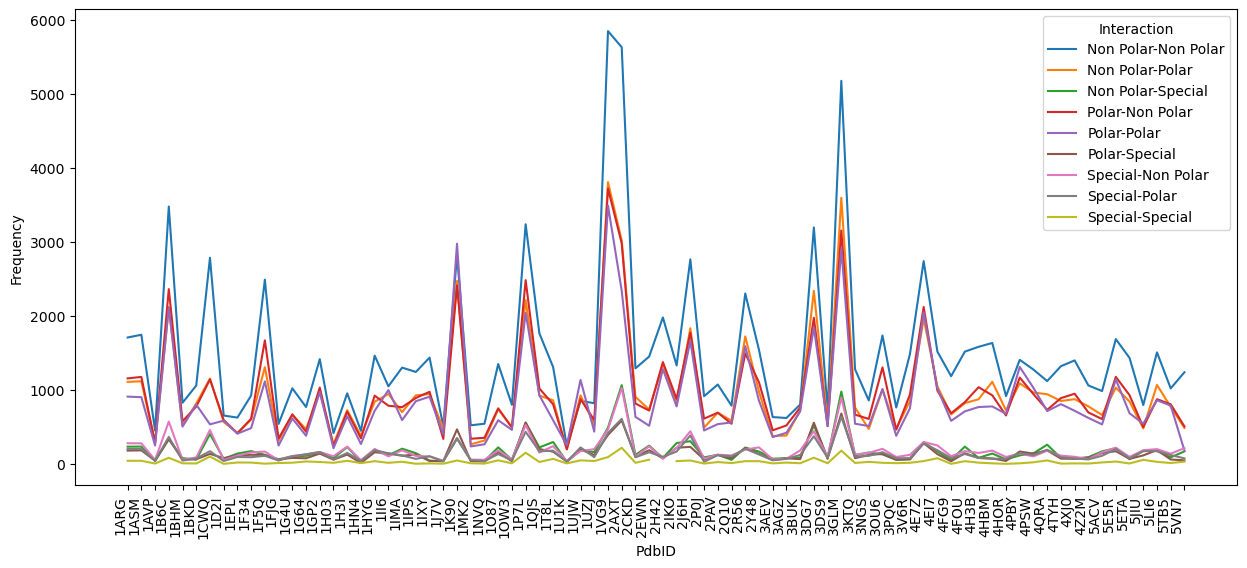

In [76]:
fig, ax = plt.subplots(figsize=(15,7))
fig.autofmt_xdate(rotation=90)
df2.groupby(['PdbID','Interaction']).count()['FrstIndex'].unstack().plot(ax=ax)
PDB_list=list(df2['PdbID'].unique())#all PDB Names
ax.set_xticks(range(0, len(PDB_list)),PDB_list,rotation=90)
ax.set_ylabel("Frequency")
fig.savefig(os.path.join(plt_path,'interaction.png'))